In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import squidpy as sq
import simstpy as sim

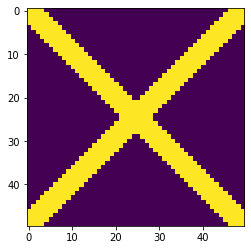

In [2]:
scotland = sim.spatial.scotland()
sim.spatial.plot_pattern(scotland)

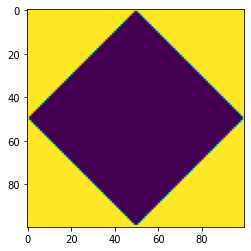

In [3]:
corners = sim.spatial.corners()
sim.spatial.plot_pattern(corners)

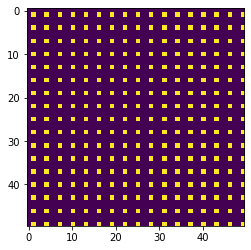

In [4]:
discrete = sim.spatial.discrete()
sim.spatial.plot_pattern(discrete)

In [5]:
adata = sc.read_h5ad(f"../simulation/reference/151507.h5ad")
adata

AnnData object with n_obs × n_vars = 4221 × 15818
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'spatialLIBD', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'leiden', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

/home/rs619065/miniconda3/envs/r-4.1/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


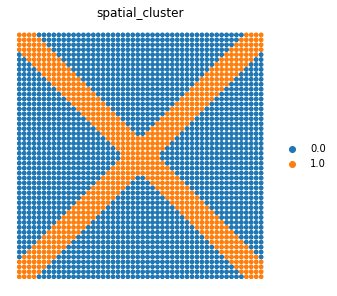

In [16]:
sim_adata = sim.rna.simulate_multi_group(n_cells=len(scotland), 
                                         n_genes=20,
                                         df_spatial=scotland, 
                                         group_name="spatial_cluster", 
                                         n_marker_genes=5)
sc.pp.normalize_total(sim_adata, target_sum=1e4)
sc.pp.log1p(sim_adata)
sim_adata = sim.rna.add_spatial_assay(sim_adata, library_id="scotland")
sq.pl.spatial_scatter(sim_adata, shape=None, color=["spatial_cluster"], frameon=False)

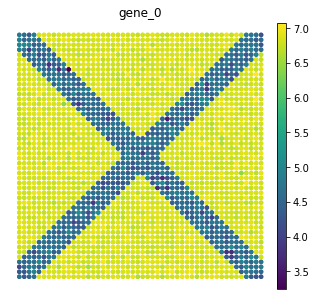

In [15]:
sq.pl.spatial_scatter(sim_adata, shape=None, color=["gene_0"], library_id="scotland", frameon=False)

/home/rs619065/miniconda3/envs/r-4.1/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


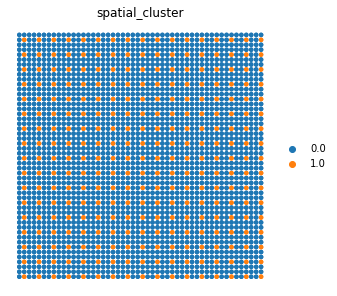

In [17]:
sim_adata = sim.rna.simulate_multi_group(n_cells=len(discrete), 
                                         n_genes=20,
                                         df_spatial=discrete, 
                                         group_name="spatial_cluster", 
                                         n_marker_genes=5)
sc.pp.normalize_total(sim_adata, target_sum=1e4)
sc.pp.log1p(sim_adata)
sim_adata = sim.rna.add_spatial_assay(sim_adata, library_id="discrete")
sq.pl.spatial_scatter(sim_adata, shape=None, color=["spatial_cluster"], frameon=False)

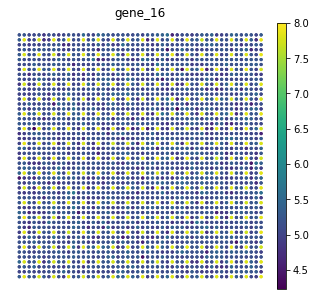

In [28]:
sq.pl.spatial_scatter(sim_adata, shape=None, color=["gene_16"], library_id="discrete", frameon=False, vmax=8, size=20)

/home/rs619065/miniconda3/envs/r-4.1/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


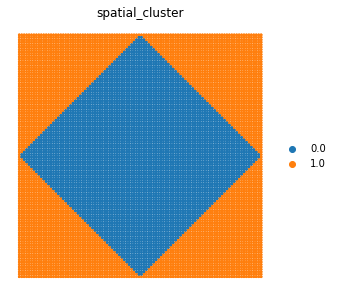

In [29]:
sim_adata = sim.rna.simulate_multi_group(n_cells=len(corners), 
                                         n_genes=20,
                                         df_spatial=corners, 
                                         group_name="spatial_cluster", 
                                         n_marker_genes=5)
sc.pp.normalize_total(sim_adata, target_sum=1e4)
sc.pp.log1p(sim_adata)
sim_adata = sim.rna.add_spatial_assay(sim_adata, library_id="corners")
sq.pl.spatial_scatter(sim_adata, shape=None, color=["spatial_cluster"], frameon=False)

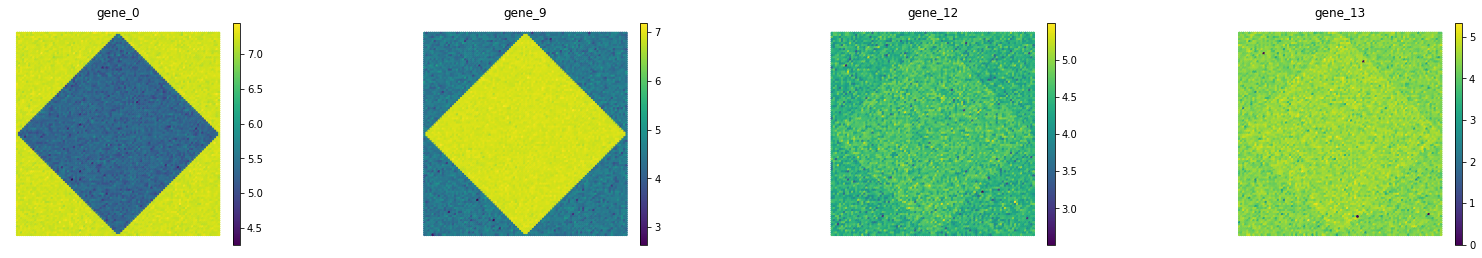

In [35]:
sq.pl.spatial_scatter(sim_adata, shape=None, color=["gene_0", "gene_9", "gene_12", "gene_13"], library_id="spatial_cluster", frameon=False)